In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

### Data overview

In [5]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Data cleaning

In [11]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df = df.rename(columns={'v1':'Target','v2':'Text'})
df.sample(5)

,Target,Text
758,ham,U should have made an appointment
3855,ham,I'm ok. Will do my part tomorrow
1902,ham,My sister got placed in birla soft da:-)
5249,ham,"K I'm leaving soon, be there a little after 9"
4584,spam,U have a Secret Admirer who is looking 2 make ...


In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [18]:
df.duplicated().sum()

403

In [20]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

### EDA

In [24]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

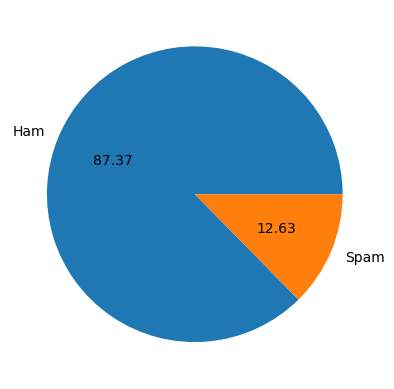

In [33]:
plt.pie(df['Target'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

 Data is imbalanced

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yogesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [36]:
df['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object

In [41]:
df['num_characters'] = df['Text'].apply(len)
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [40]:
df['num_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [43]:
df['num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [45]:
df.describe()

,Target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [46]:
df[df['Target'] == 0].describe()    #ham

,Target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [47]:
df[df['Target'] == 1].describe()   #spam

,Target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


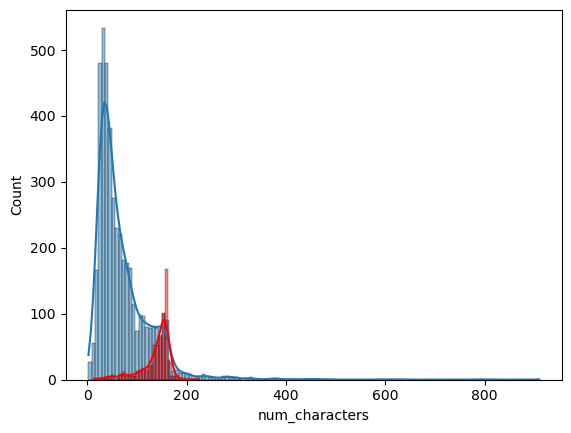

In [52]:
sns.histplot(df[df['Target'] == 0]['num_characters'],kde=True)
sns.histplot(df[df['Target'] == 1]['num_characters'],kde=True,color='red')
plt.show()

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


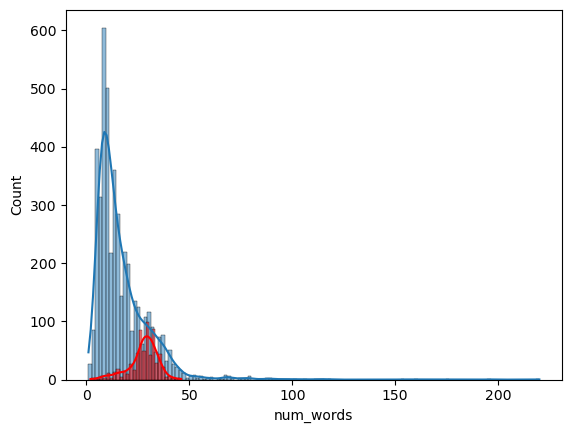

In [53]:
sns.histplot(df[df['Target'] == 0]['num_words'],kde=True)
sns.histplot(df[df['Target'] == 1]['num_words'],kde=True,color='red')
plt.show()

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


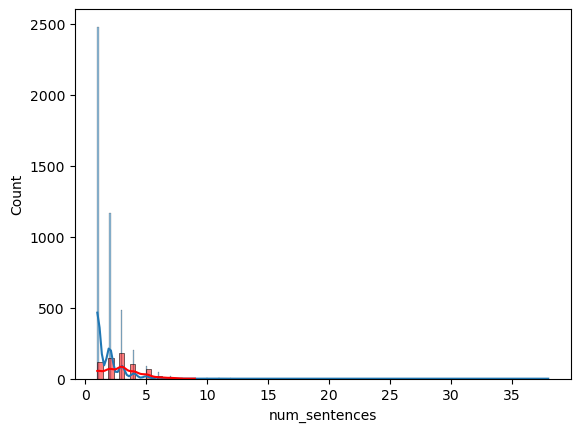

In [54]:
sns.histplot(df[df['Target'] == 0]['num_sentences'],kde=True)
sns.histplot(df[df['Target'] == 1]['num_sentences'],kde=True,color='red')
plt.show()

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


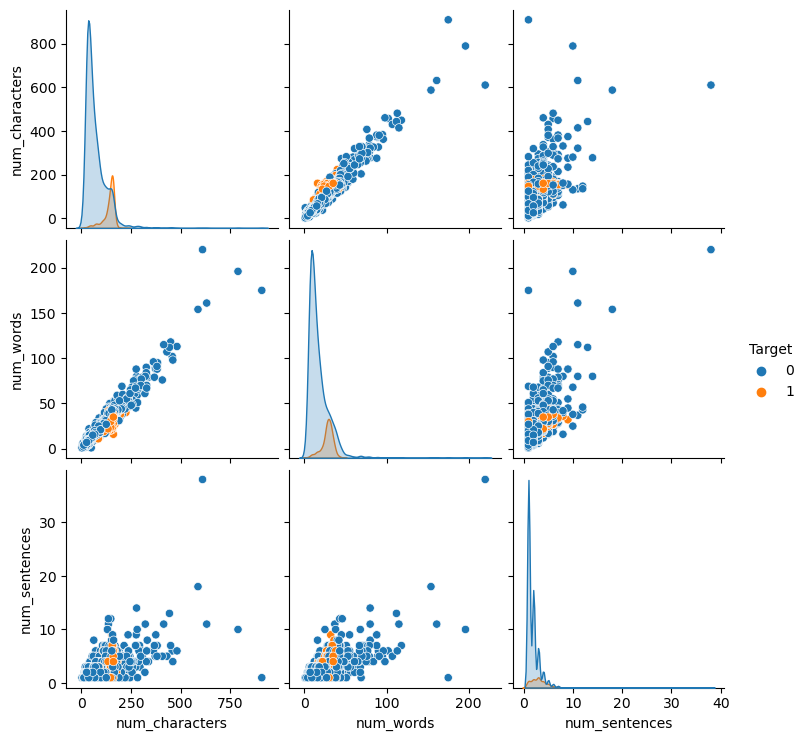

In [56]:
sns.pairplot(df,hue='Target')   

In [60]:
df1 = df.drop('Text',axis=1)
df1.head()

,Target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


In [61]:
df1.corr()

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

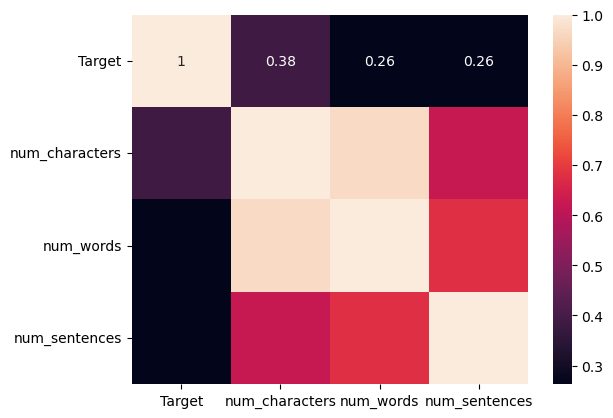

In [65]:
sns.heatmap(df1.corr(),annot=True)

we select only one num_characters as these three are highly co-related

### Data Preprocessing

- Lowecase
- Tokenization
- Removing special characters
- Removing stop words and punctuations
- stemming

In [108]:
def transfrom_text(text):
    
    #Lowering
    text = text.lower()
    #Tokenization
    text = nltk.word_tokenize(text)
    
    #removing special character
    tokens = []
    for i in text:
        if i.isalnum():
            tokens.append(i)
            
    #removing punctuations and stopwords        
    y = []     
    for t in tokens:
        if t not in stopwords.words('english') and t not in string.punctuation:
            y.append(t)
    tokens.clear()
     
        
    #stemming
    texts = []
    for i in y :
        ps = PorterStemmer()
        texts.append(ps.stem(i))
    y.clear()
            
    return " ".join(texts)

In [109]:
text = df['Text'][0]
x  = transfrom_text(text)
print(x)

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [82]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [110]:
df['Transformed_text'] = df['Text'].apply(transfrom_text)
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [121]:
#worldcloud
wc = WordCloud(width= 500, height=500, min_font_size=10, background_color='white' )

In [122]:
spam_wc = wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep=" "))

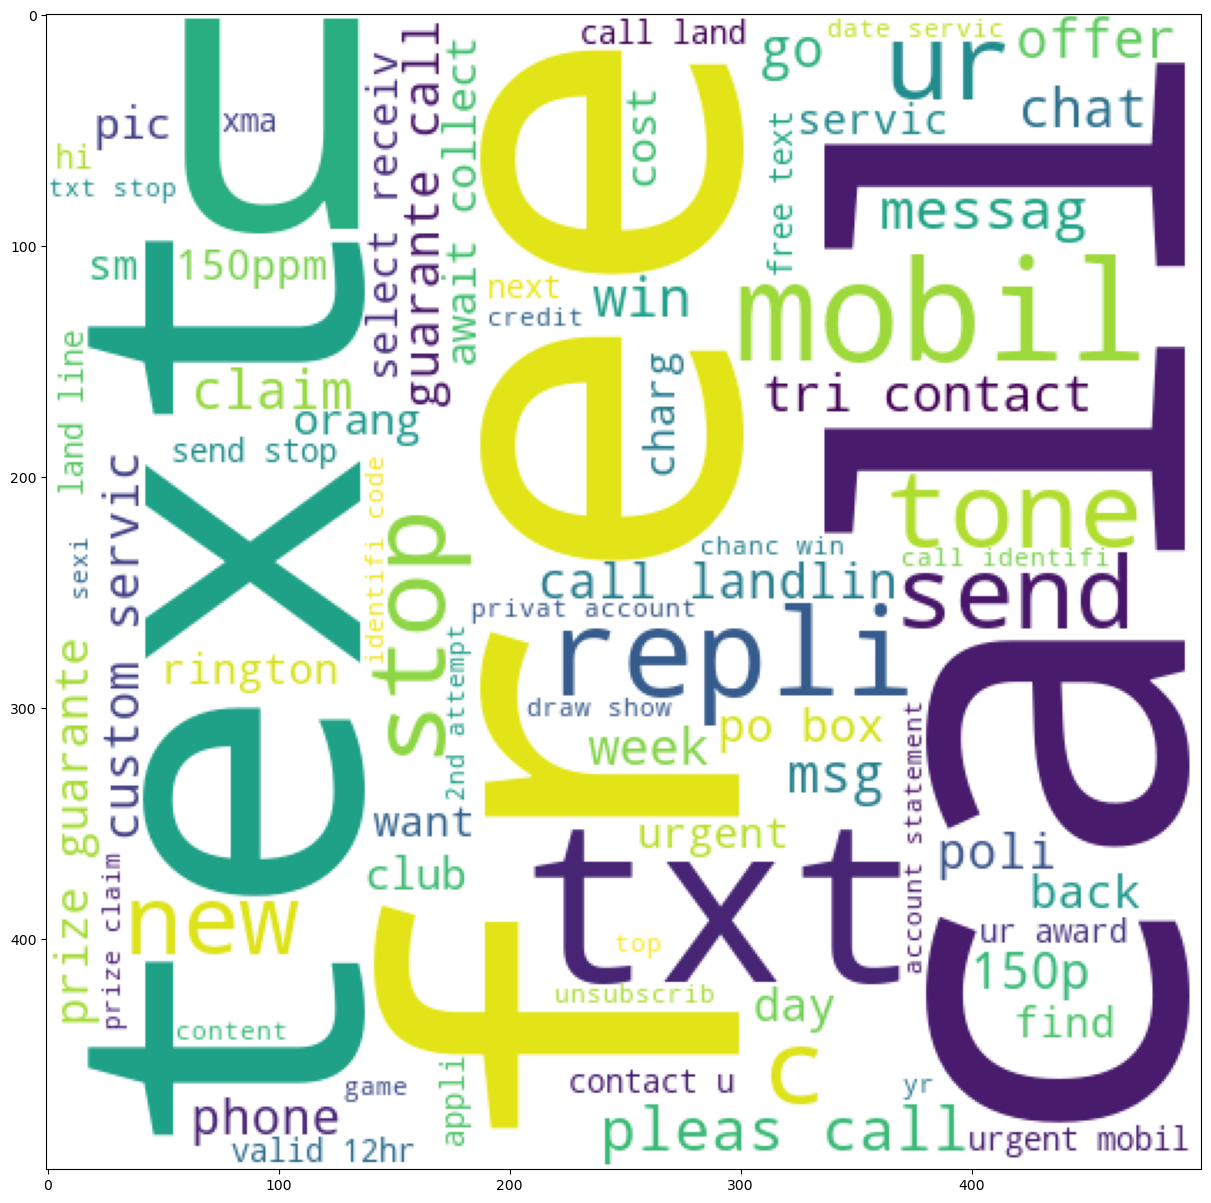

In [125]:
plt.figure(figsize=(15,15))
plt.imshow(spam_wc)

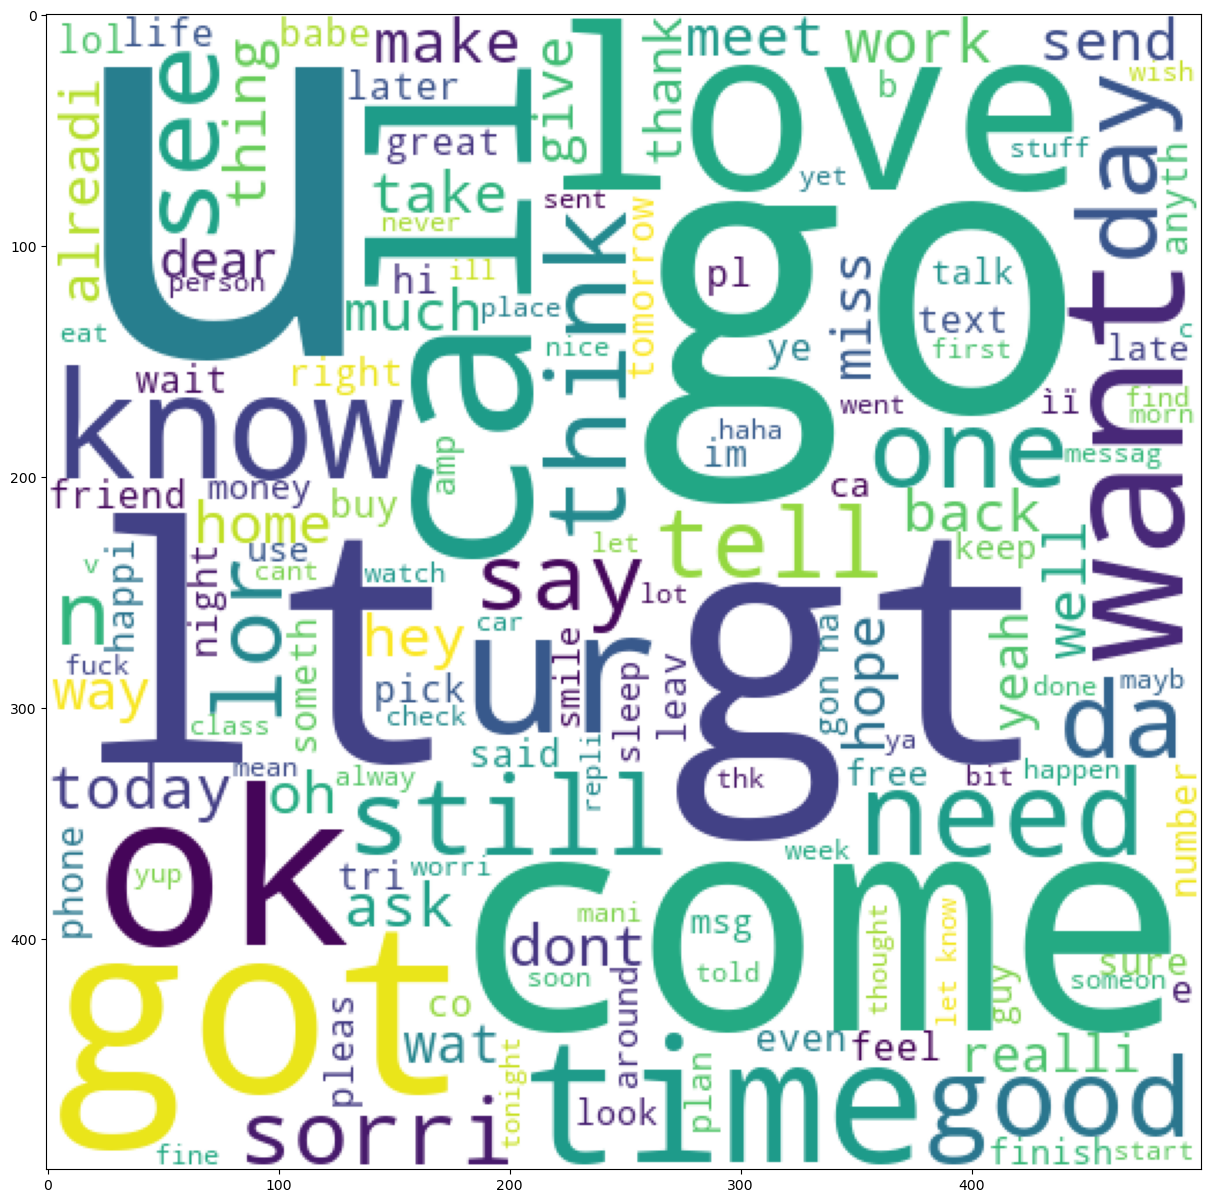

In [126]:
ham_wc = wc.generate(df[df['Target']==0]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,15))
plt.imshow(ham_wc)

In [129]:
#Top 30 words in spam and ham
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [131]:
len(spam_corpus)

9939

In [132]:
from collections import Counter
most_common_30 = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [140]:
most_common_30[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

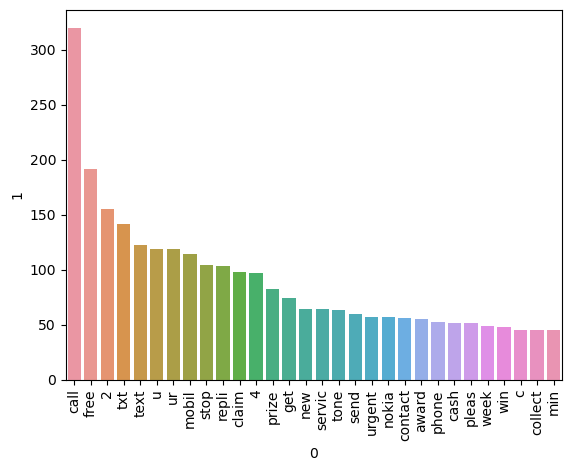

In [143]:
sns.barplot(data=most_common_30, x = most_common_30[0], y=most_common_30[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building

#### Using Count Vectorizer

In [144]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [146]:
x = cv.fit_transform(df['Transformed_text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [148]:
x.shape   #we have total 6708 words

(5169, 6708)

In [151]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [231]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [158]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [162]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)

print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [164]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)

print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [165]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)

print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


#### Using TFIDF vectorizer

In [264]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [265]:
x1 = tfidf.fit_transform(df['Transformed_text']).toarray()
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [266]:
x1.shape

(5169, 6708)

In [267]:
y.shape

(5169,)

In [268]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=2)

In [178]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)

print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [269]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)

print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [180]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)

print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


 Selecting TFIDF - MNB as of now

In [221]:
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

print(accuracy_score(y_test,y_pred_dtc))
print(confusion_matrix(y_test,y_pred_dtc))
# print(precision_score(y_test,y_pred_dtc))

[[878  18]
 [ 50  88]]


#### Trying different Algorithms

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [226]:
svc = SVC(kernel='sigmoid',gamma=0.1)
mnb = MultinomialNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc =  AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [227]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [234]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    pre = precision_score(y_test,y_pred)
    
    return acc,pre

In [235]:
acc_scores = []
pre_scores = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test) 
    print("For ", name)
    print("Accuracy ", current_accuracy)
    print("Precision ", current_precision)
    
    acc_scores.append(current_accuracy)
    pre_scores.append(current_precision)

For  SVC
Accuracy  0.9110251450676983
Precision  0.9791666666666666
For  KN
Accuracy  0.9003868471953579
Precision  1.0
For  NB
Accuracy  0.9593810444874274
Precision  1.0
For  DT
Accuracy  0.9361702127659575
Precision  0.8461538461538461
For  LR
Accuracy  0.9516441005802708
Precision  0.94
For  RF
Accuracy  0.971953578336557
Precision  1.0
For  AdaBoost
Accuracy  0.9613152804642167
Precision  0.9454545454545454
For  BgC
Accuracy  0.9584139264990329
Precision  0.8625954198473282
For  ETC
Accuracy  0.9729206963249516
Precision  0.9824561403508771
For  GBDT
Accuracy  0.9526112185686654
Precision  0.9238095238095239
For  xgb
Accuracy  0.9700193423597679
Precision  0.9349593495934959


In [239]:
performance_df = pd.DataFrame({'Algorithms':clfs.keys(), 'Accuracy':acc_scores, 'Precision':pre_scores})

In [240]:
performance_df

,Algorithms,Accuracy,Precision
0,SVC,0.911025,0.979167
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.936170,0.846154
4,LR,0.951644,0.940000
5,RF,0.971954,1.000000
6,AdaBoost,0.961315,0.945455
7,BgC,0.958414,0.862595
8,ETC,0.972921,0.982456
9,GBDT,0.952611,0.923810


In [244]:
performance_df.sort_values('Precision',ascending=False)

,Algorithms,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.911025,0.979167
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.970019,0.934959
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


#### Model Improvement

- max feature parameter in TfIdf

- Scaling result of vectorization - seen no improvement

- Integrating additional features columns(no_of_words,etc.) - seen no improvement

In [247]:
#appending num_character col to x
X = np.hstack((x,df['num_characters'].values.reshape(-1,1)))
X.shape

(5169, 6709)

In [249]:
X[:,-1]

array([111.,  29., 155., ...,  57., 125.,  26.])

- Voting classifier (combination of top models from perfromance_table) - not much improvement same as naked algo

In [250]:
from sklearn.ensemble import VotingClassifier

In [251]:
svc = SVC(kernel='sigmoid',gamma=0.1,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [252]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [253]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=0.1, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [254]:
y_pred = voting.predict(X_test)
print('Accuracy :', accuracy_score(y_test,y_pred))
print('Precision :', precision_score(y_test,y_pred))

Accuracy : 0.97678916827853
Precision : 0.9913793103448276


In [255]:
#replacing svc with rf
voting = VotingClassifier(estimators=[('rfc',rfc),('nb',mnb),('et',etc)],voting='soft')

In [256]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [257]:
y_pred = voting.predict(X_test)
print('Accuracy :', accuracy_score(y_test,y_pred))
print('Precision :', precision_score(y_test,y_pred))

Accuracy : 0.971953578336557
Precision : 1.0


- Stacking classifier (combination of top models from perfromance_table) - no improvement

In [258]:
from sklearn.ensemble import StackingClassifier

In [259]:
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [260]:
clf  = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [261]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=0.1, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [263]:
y_pred = clf.predict(X_test)
print('Accuracy :', accuracy_score(y_test,y_pred))
print('Precision :', precision_score(y_test,y_pred))

Accuracy : 0.97678916827853
Precision : 0.9318181818181818


### Creating Pipeline

#### Dumping file for project in Pycharm

In [270]:
import pickle

In [272]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [273]:
pickle.dump(mnb,open('model.pkl','wb'))